In [1]:
from NSGPy.NumPy import LLS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from GPy.models import GPRegression
from GPy.kern import RBF

### Peciorek - Function 2

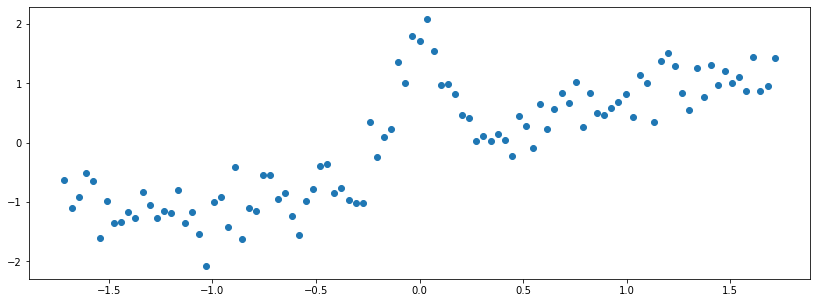

In [2]:
Xscaler = StandardScaler()
Yscaler = StandardScaler()
np.random.seed(0)
X = np.linspace(-2,2,101).reshape(-1,1)
y = np.sin(X) + 2*np.exp(-30*X**2) + np.random.normal(0,0.3,101).reshape(-1,1)
X = Xscaler.fit_transform(X)
y = Yscaler.fit_transform(y)
plt.figure(figsize=(14,5))
plt.scatter(X, y);

GP_regression.,value,constraints,priors
rbf.variance,0.7220648518547257,+ve,
rbf.lengthscale,0.2151414294014641,+ve,
Gaussian_noise.variance,0.10605501506876364,+ve,


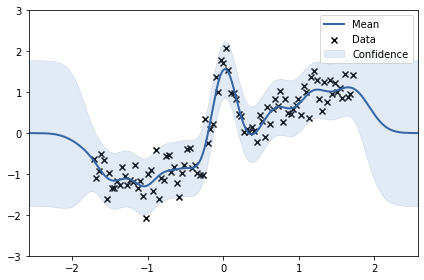

In [3]:
model = GPRegression(X, y, RBF(input_dim=1))
model.optimize()
model.plot()
plt.ylim(-3,3)
model

{'likelihood (mll)': -39.640669789120196,
 'GP_variance (sigma_f)': array([1.56648285]),
 'GP_noise_level (sigma_n)': array([0.2170775]),
 'L_GP_variance (sigma_f_bar)': array([0.00127925]),
 'L_GP_lengthscale (sigma_l_bar)': array([0.20989458]),
 'L_GP_noise_level (sigma_n_bar)': array([1.e-05]),
 'N_lengthscales (l_bar)': array([[5.70080845e-01],
        [4.76325147e+00],
        [3.30903705e-05],
        [3.53435589e+00],
        [4.05630248e+00]])}

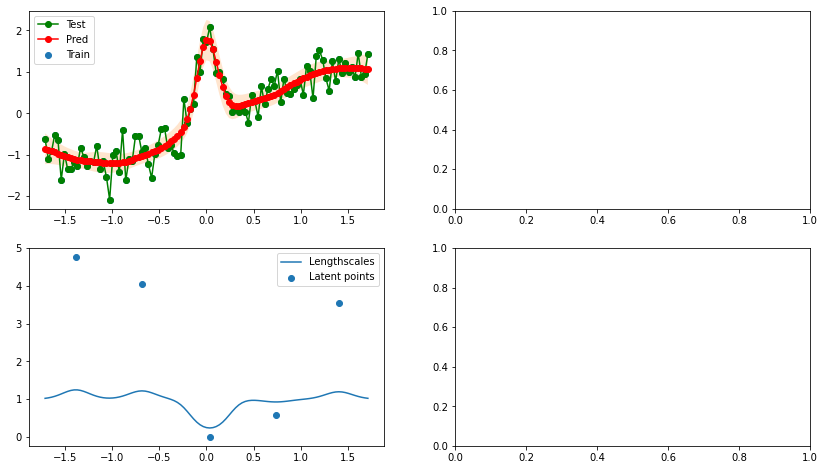

In [18]:
fig, ax = plt.subplots(2,2,figsize=(14,8))
model = LLS(input_dim=1, N_l_bar=5, bounds=(10**-5,10**5))
model.fit(X, y, n_restarts=5)
model.predict_plot(ax, X, y);
model.get_params()
# model.predict_lengthscales_(X)